# 𝔸𝕀 𝕚𝕞𝕒𝕘𝕖 𝕒𝕟𝕒𝕝𝕪𝕤𝕚𝕤 𝕗𝕠𝕣 𝕘𝕖𝕠𝕤𝕔𝕚𝕖𝕟𝕔𝕖 𝕚𝕟 𝟚𝟘𝟚𝟜

Let's test multi-modal LLMs with some questions about images.

This notebook asks scientific questions about geological and geophysical images. We focus on zero-shot questions for now, with almost all the context coming from the image (and a very small amount from the questions). This is perhaps the least fair approach, but I think it's a good way to get a feel for the 'out of the box' capability of the models.

Along with the local file `convo.py`, and Jupyter of course, you need a few other libraries to run this notebook:

- `python-dotenv`
- `openai`
- `pillow`
- `numpy`
- `matplotlib`

## Test the endpoints

In [1]:
from convo import Convo

In [60]:
Convo.notebook = False
providers = ['qwen', 'anthropic', 'openai', 'mistral', 'gemini']
models = ['qwen-plus', 'claude-sonnet-4-5-20250929', 'gpt-5-mini', 'mistral-medium-latest', 'gemini-2.5-flash']
for provider, model in zip(providers, models):
    Convo.provider = provider
    Convo.model = model
    c = Convo()
    print(f"{provider}/{model} ", end='')
    print(c.ask('Repeat exactly: ✅ System check', image_uri='file://1x1#FFFFFF.png'))

qwen/qwen-plus ✅ System check
anthropic/claude-sonnet-4-5-20250929 ✅ System check
openai/gpt-5-mini ✅ System check
mistral/mistral-medium-latest ✅ System check
gemini/gemini-2.5-flash ✅ System check


---
# Asking questions about images

There are several kinds of questions we might like to ask:

- Recover text or numbers from the image, eg to read a document or sign in an image
- Texture and object recognition
- Segmentation, eg for analysis of proportional area
- Measurements from the image, eg of objects or the space between them
- ❗ Descriptions of the content, eg to help make sense of a document or prepare a searchable index
- ❗ Questions about the content, eg to learn something about the image that might not be in a description
- ❗ Questions about what the content implies about the past, eg because the image can be interpreted by someone with insight
- ❗ Questions about what the content implies about the future, eg because of cause and effect
- ...and so on

All of these tasks are quite hard, but those with ❗ were extremely hard to do before multi-modal generative AI models came along. 


# Map and cross-section

[The image](https://www.usgs.gov/media/images/typical-geologic-map) is from the USGS and is public domain.

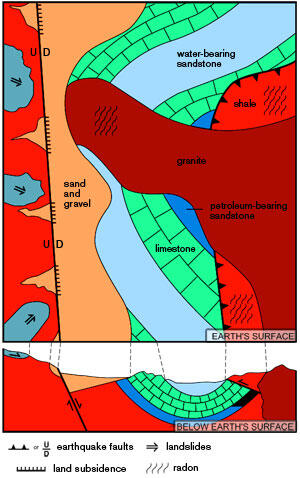

In [2]:
from IPython.display import Image, Markdown

image_url = "./USGS_palladium_sollerfig1.jpg"
Image(image_url)

<div style="border: 3px solid #aaaaee; border-radius: 5px; background-color: #eeeeff; padding: 5px 10px 5px 10px; min-height: 427.8933333333333px;">
                  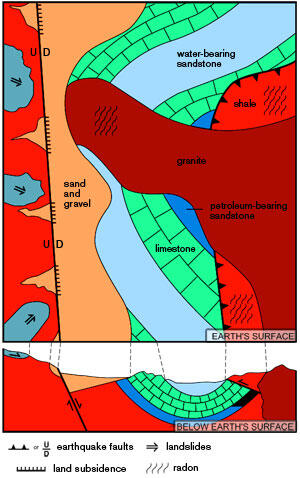
                  <h4>Which is younger, the limestone or the shale? Give your reason but be brief.</h4>
                  <hr height="10px" color="#aaaaee" />
                  <h4 style="color: #aaaaee;">openai/gpt-4o</h4>
                  
The limestone is younger than the shale. In the diagram, the limestone layer is above the shale layer, indicating it was deposited later.
</div>

In [3]:
Convo.notebook = True
Convo.provider = 'openai'
Convo.model = 'gpt-4o'

q = ("Which is younger, the limestone or the shale? "
     "Give your reason but be brief.")
     # The limestone is younger.

c = Convo()
a = c.ask(q, image_url)

Markdown(a)

<div style="border: 3px solid #aaaaee; border-radius: 5px; background-color: #eeeeff; padding: 5px 10px 5px 10px; min-height: 427.8933333333333px;">
                  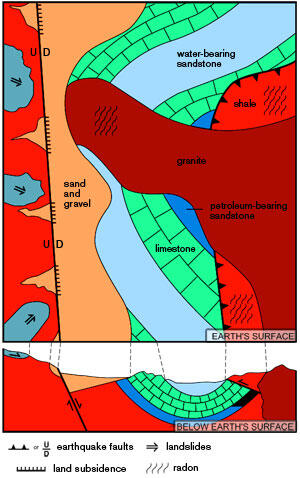
                  <h4>Which is younger, the limestone or the shale? Give your reason but be brief.</h4>
                  <hr height="10px" color="#aaaaee" />
                  <h4 style="color: #aaaaee;">anthropic/claude-3-5-haiku-20241022</h4>
                  
The limestone is younger than the shale. This can be determined from the geological map by observing the relative positioning and cross-cutting relationships of the rock layers, where the limestone appears to overlay and intrude into the shale layer.
</div>

In [4]:
Convo.provider = 'anthropic'
Convo.model = 'claude-3-5-haiku-20241022'

c = Convo()
a = c.ask(q, image_url)

Markdown(a)

<div style="border: 3px solid #aaaaee; border-radius: 5px; background-color: #eeeeff; padding: 5px 10px 5px 10px; min-height: 427.8933333333333px;">
                  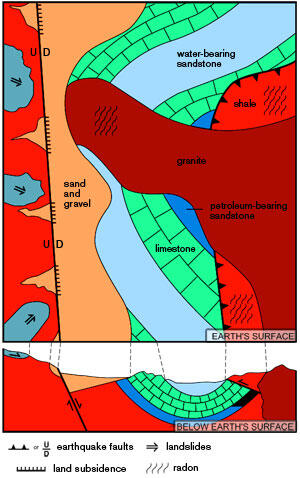
                  <h4>Which is younger, the limestone or the shale? Give your reason but be brief.</h4>
                  <hr height="10px" color="#aaaaee" />
                  <h4 style="color: #aaaaee;">gemini/gemini-2.0-flash</h4>
                  
The shale is younger. The shale and limestone do not appear to directly touch in the illustration. However, the shale layer overlays the granite, which overlays the limestone. Therefore, the shale is younger than the limestone.
</div>

In [5]:
Convo.provider = 'gemini'
Convo.model = 'gemini-2.0-flash'

c = Convo()
a = c.ask(q, image_url)

Markdown(a)

# Seismic section

The image is from the [Sub-Surf Rocks blog](http://sub-surfrocks.co.uk/?page_id=197) at the University of Derby, who have licensed it from the UK Onshore Geophysical Library. The license terms are not clear, but [the UKOGL](https://ukogl.org.uk/) calls the image 'free'.

This is the Weald Anticline, a reactivated rift.

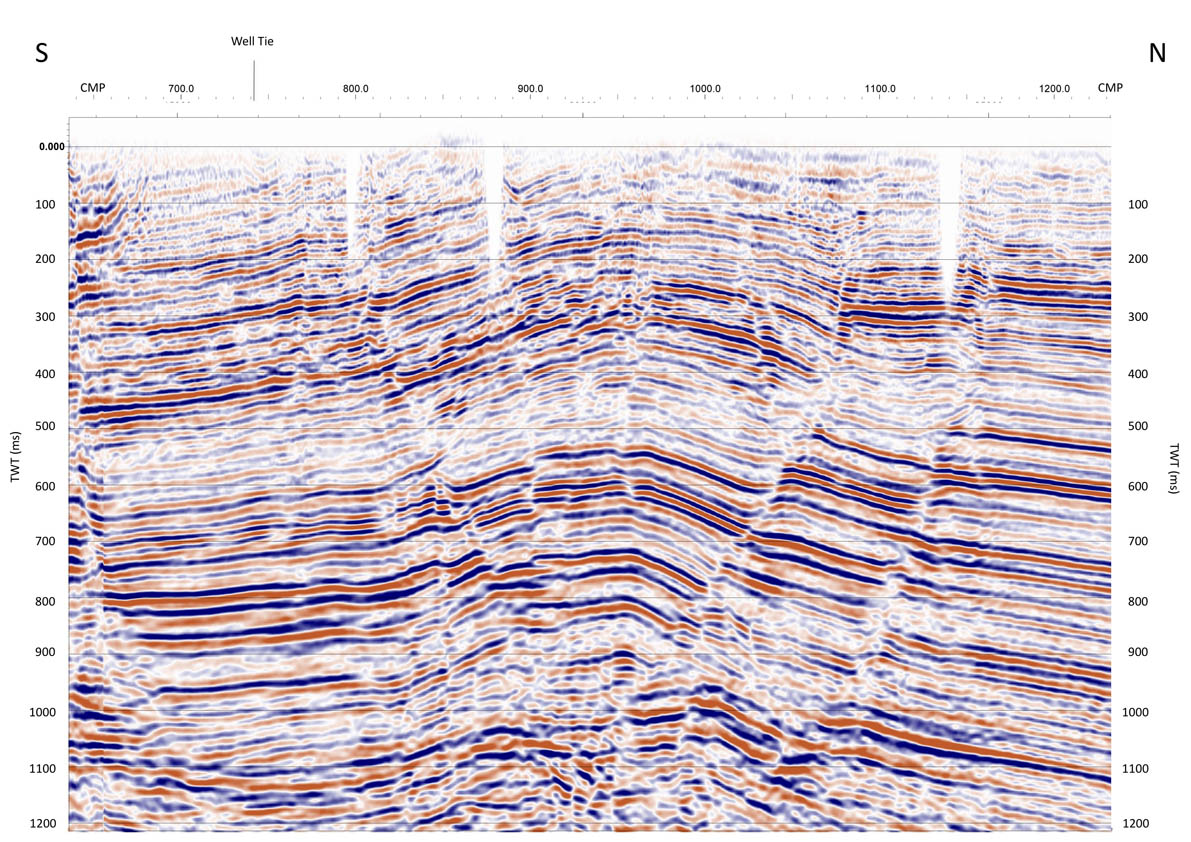

In [52]:
image_url = "subsurfrocks__seismic_a3_colour.jpg"
Image(image_url)

<div style="border: 3px solid #aaaaee; border-radius: 5px; background-color: #eeeeff; padding: 5px 10px 5px 10px; min-height: 200.9840470193115px;">
                  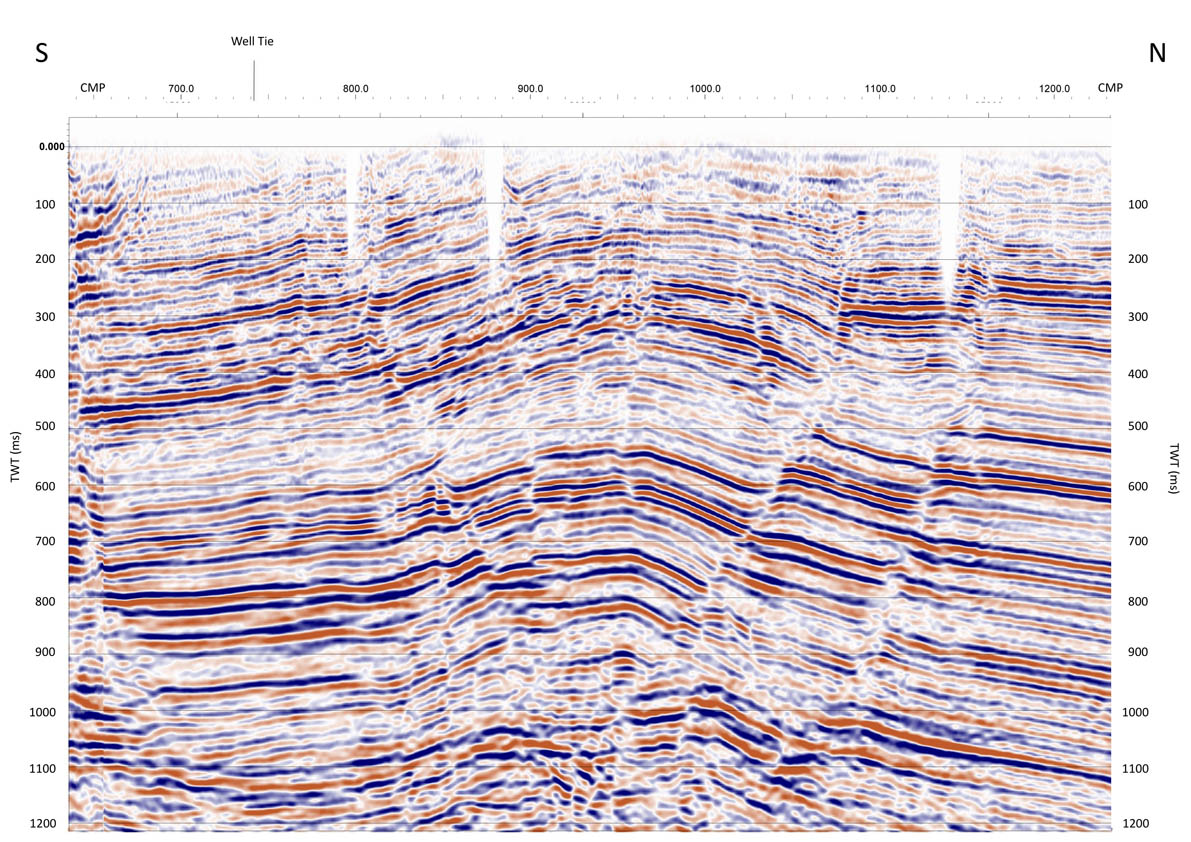
                  <h4>Describe the structural geology. Explain your reasoning but be brief.</h4>
                  <hr height="10px" color="#aaaaee" />
                  <h4 style="color: #aaaaee;">openai/gpt-4o</h4>
                  The seismic section displays a series of sub-horizontal, stratified reflectors with some noticeable structural features. The reflectors are densely packed and exhibit some folding and slight faulting, especially in the central part of the image.

1. **Folding:** The undulating nature of the reflectors suggests gentle folding, possibly indicative of compressional tectonic forces.

2. **Faulting:** Discontinuities in the reflectors, predominantly vertical or near-vertical, suggest the presence of faults. These are likely normal faults, indicated by slight displacements compatible with extensional settings.

Overall, the structural geology indicates a combination of folding and faulting, possibly reflecting tectonic activity or sedimentary processes that affected the substrate over geological time.
                </div>

In [53]:
Convo.provider = 'openai'
Convo.model = 'gpt-4o'

q = ("Describe the structural geology. "
     "Explain your reasoning but be brief.")
     # Rift reactivation.

c = Convo()
a = c.ask(q, image_url)

Markdown(a)

# Core photo

The image is from [REP Austria's website](https://www.rep-austria.at/en/services-expertise/geologie/reservoir-characterisation-formation-evaluation.html) and is used here under the fair use doctrine.

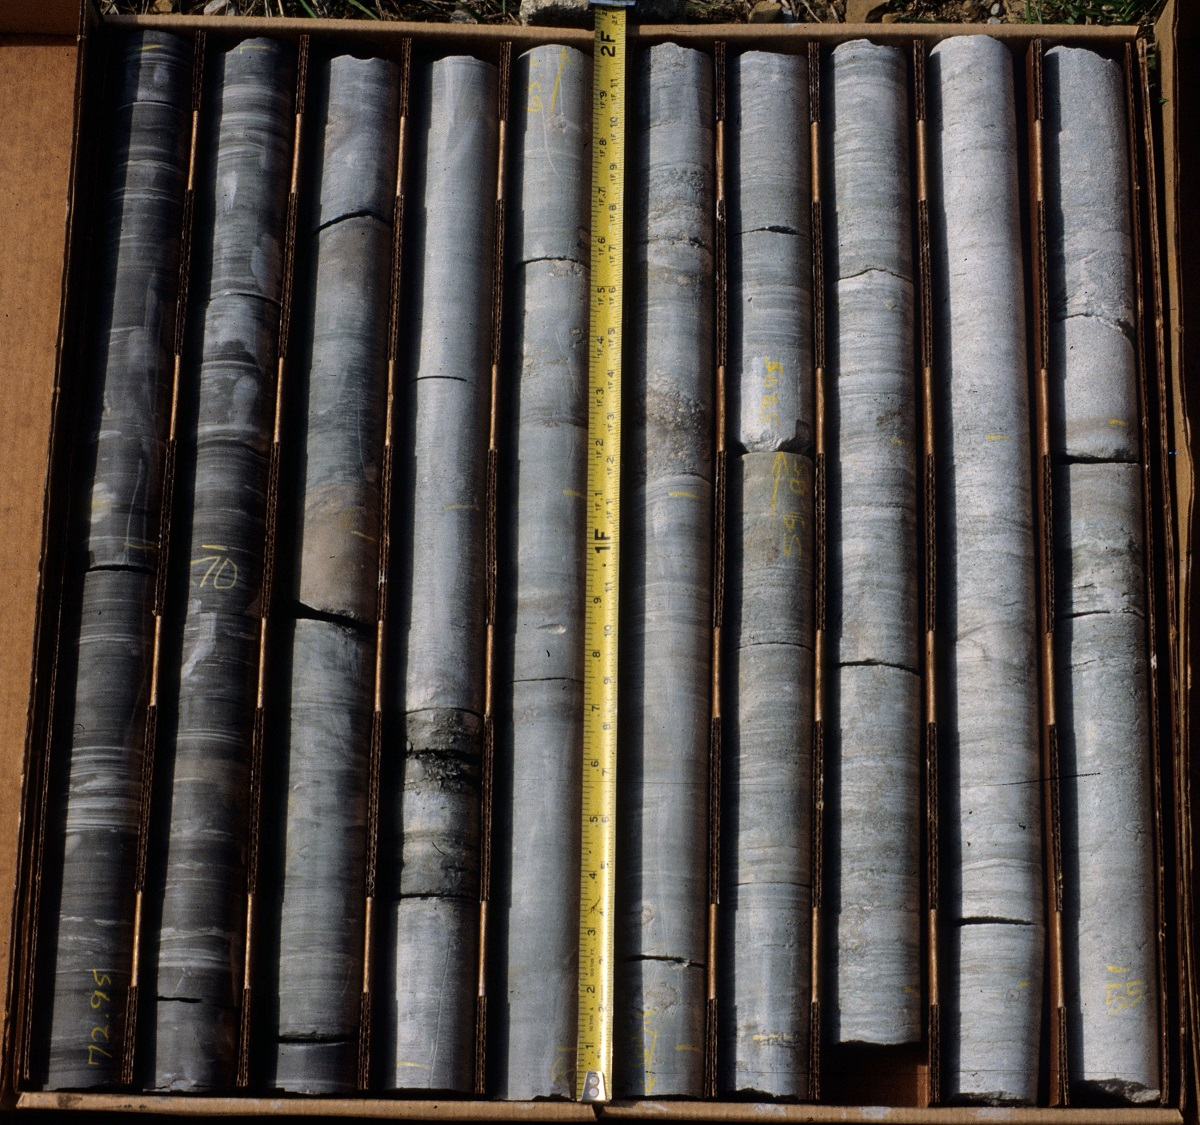

In [54]:
image_url = "./Fig_0C5_core with depths written on it WKUG1_53-72.jpg"
Image(image_url)

<div style="border: 3px solid #aaaaee; border-radius: 5px; background-color: #eeeeff; padding: 5px 10px 5px 10px; min-height: 260.0px;">
                  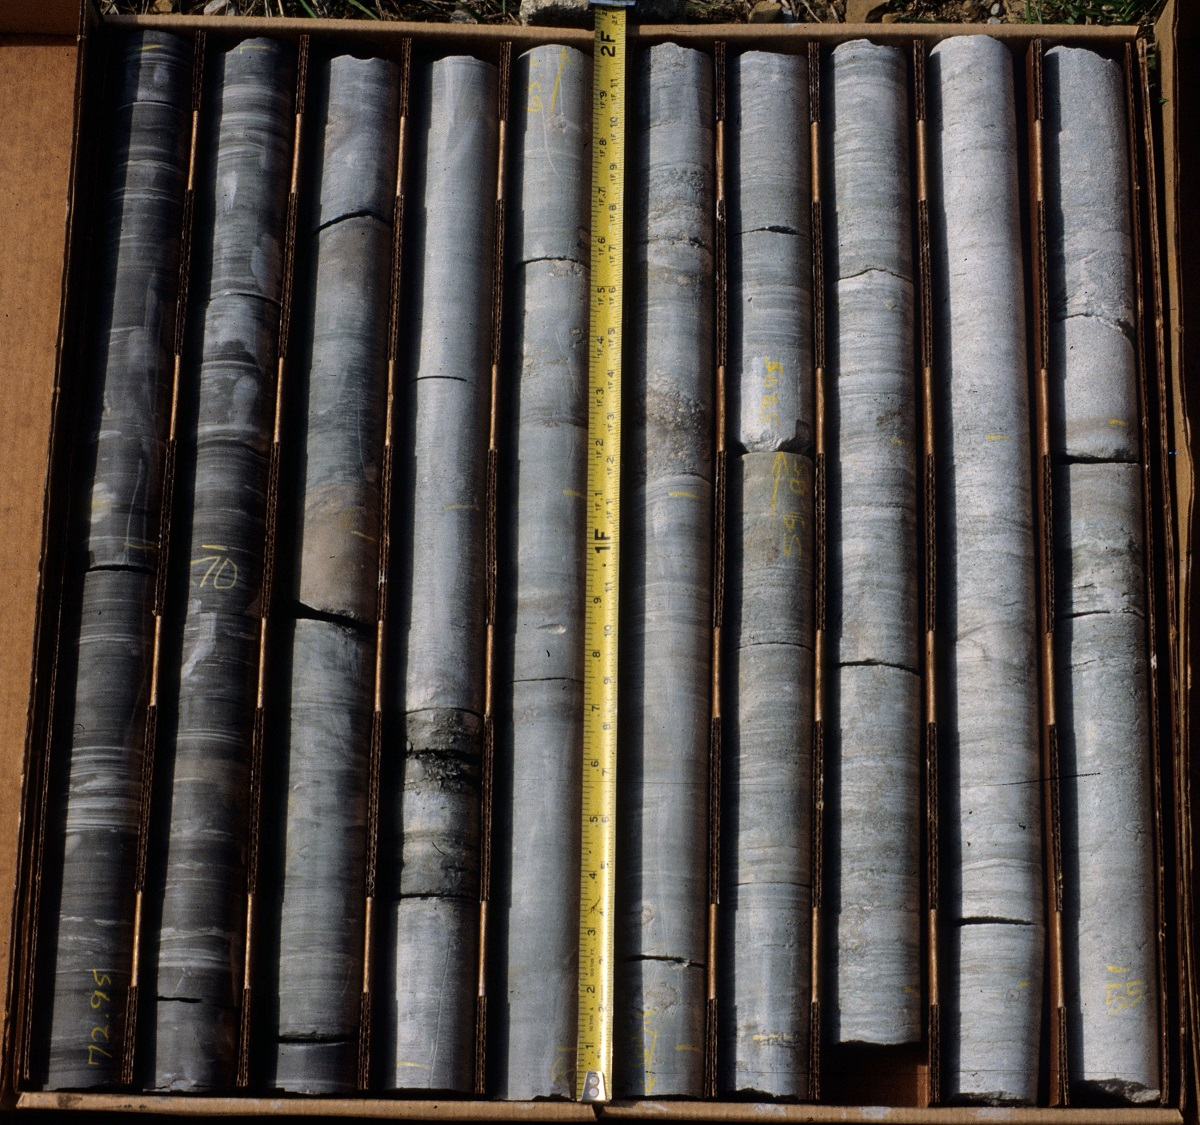
                  <h4>How much core is there here?Explain your reasoning but be brief.</h4>
                  <hr height="10px" color="#aaaaee" />
                  <h4 style="color: #aaaaee;">openai/gpt-4o</h4>
                  The image shows a set of core samples organized in a box. The ruler in the middle marks up to 2 feet, and there are two rows of cores, each aligning closely with the ruler's length. This suggests each row is about 2 feet long. 

Estimating visually, there are about 14 cores arranged in two rows. With two rows at about 2 feet each, that's approximately 4 feet of core per column. 

In total, the box appears to contain around 4 feet of core samples.
                </div>

In [55]:
Convo.provider = 'openai'
Convo.model = 'gpt-4o'

q = ("How much core is there here?"
     "Explain your reasoning but be brief.")
     # 20 ft or about 6 m

c = Convo()
a = c.ask(q, image_url)

Markdown(a)

# Block diagram: spatio-temporal reasoning

This image is from [Robert S Leighty's Geology 101 course](https://physci.mesacc.edu/Geology/Leighty/GLG101IN/GLG101IN_Lab03_GeologicMaps/GLG101IN_Lab03_GeologicMaps5.html) at Mesa Community College.

It used to be available online but now it's behind a bot-wall.

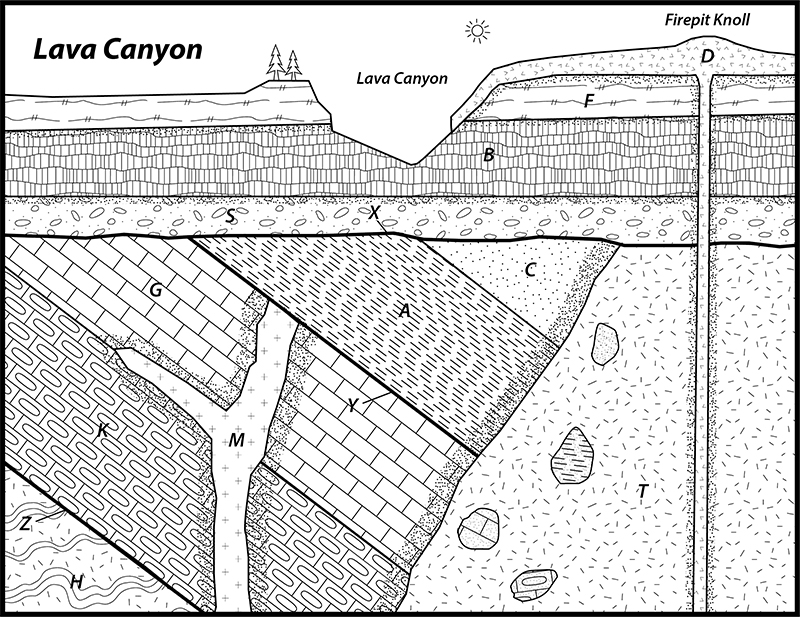

In [21]:
image_url = "./Leighty_MesaCC_GLG101IN_Lab03_Fig23_LavaCanyonSequenceDiagram_800x617.jpg"
Image(image_url)

<div style="border: 3px solid #aaaaee; border-radius: 5px; background-color: #eeeeff; padding: 5px 10px 5px 10px; min-height: 217.44px;">
                  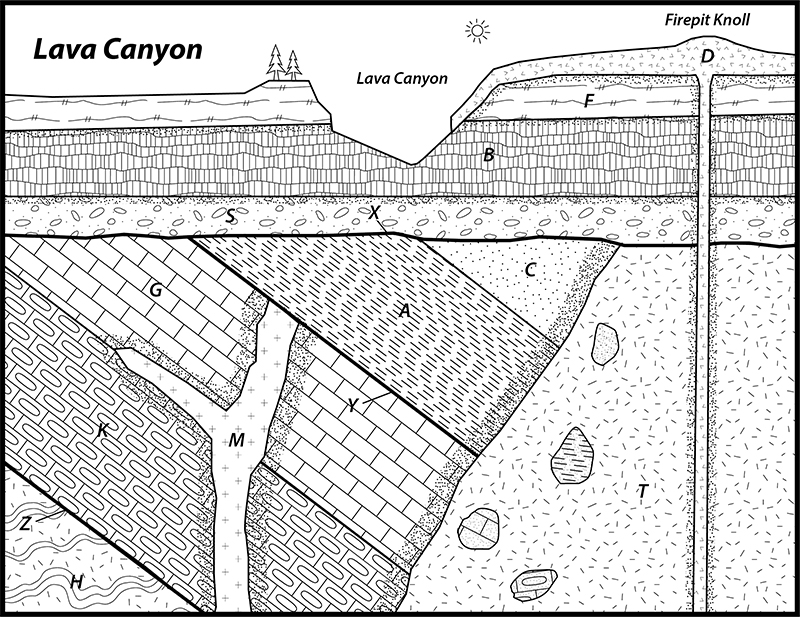
                  <h4>Which is older: T, A, M or X?Explain your reasoning but be brief.</h4>
                  <hr height="10px" color="#aaaaee" />
                  <h4 style="color: #aaaaee;">gemini/gemini-2.0-flash</h4>
                  
Here's the breakdown of the relative ages of T, A, M, and X based on the image:

*   **Oldest:** T
*   Next: A
*   Next: M
*   **Youngest:** X

**Reasoning:**

*   A cross-cuts the T.
*   M cross-cuts the A.
*   X is the top layer in the bottom right.
</div>

In [25]:
Convo.provider = 'openai'
Convo.model = 'gpt-4o'

q = ("Which is older: T, A, M or X?"
     "Explain your reasoning but be brief.")
     # M.

c = Convo()
a = c.ask(q, image_url)

Markdown(a)

# Photomicrograph: image analysis

The image of a Wolfville Formation (Jurassic) sandstone from Nova Scotia is licensed CC BY-SA by Michael C Rygel, and taken from the Wikipedia page on [lithic sandstone](https://en.wikipedia.org/wiki/Lithic_sandstone).

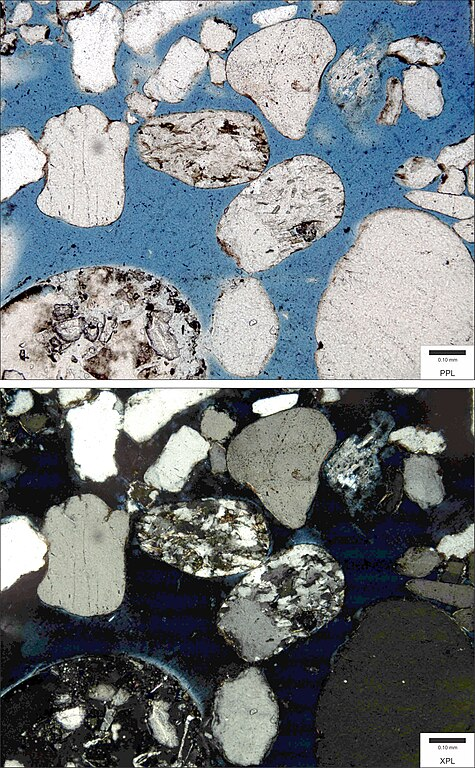

In [26]:
image_url = "NS_sandstone__CC_BY-SA__Michael_C_Rygel__Lithic-arenite.jpg"
Image(image_url)

We can do this with a little code, making it easy for ourselves by assuming that all the pixels with low red values are cement.

32.654293628808865


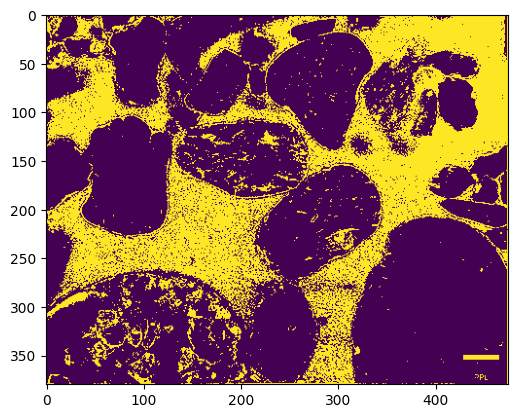

In [27]:
from PIL import Image as PILImage
import io
import numpy as np
import matplotlib.pyplot as plt

image = PILImage.open(image_url)
rgb = np.asarray(image)
mask = rgb[:380, :, 0] < 100
plt.imshow(mask)
print(100 * np.sum(mask) / mask.size)

<div style="border: 3px solid #aaaaee; border-radius: 5px; background-color: #eeeeff; padding: 5px 10px 5px 10px; min-height: 433.9115789473684px;">
                  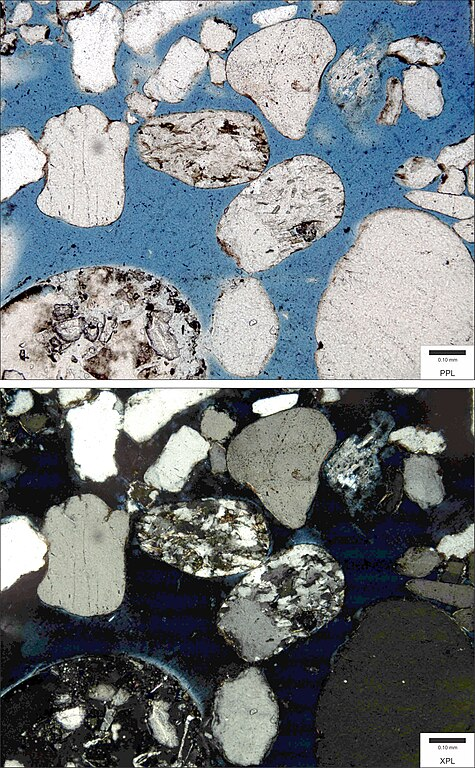
                  <h4>What is the volume fraction of porosity? Explain your reasoning but be brief.</h4>
                  <hr height="10px" color="#aaaaee" />
                  <h4 style="color: #aaaaee;">gemini/gemini-2.0-flash</h4>
                  
Based on the image, I would estimate the volume fraction of porosity to be roughly 25-30%.

Reasoning:

The blue-colored areas in the top image (PPL) represent pore space filled with epoxy, thus porosity. Visually estimating the area occupied by the blue epoxy compared to the total area, it seems to occupy about 25-30% of the image.

</div>

In [28]:
Convo.provider = 'gemini'
Convo.model = 'gemini-2.0-flash'

q = ("What is the volume fraction of porosity? "
     "Explain your reasoning but be brief.")
     # About 33%

c = Convo()
a = c.ask(q, image_url)

Markdown(a)

# Summary

| Image           | Question                       | GPT-4o         | Claude 3.5 Haiku | Gemini 2 Flash |
|:----------------|:-------------------------------|:--------------:|:----------------:|:--------------:|
| Map             | Shale or limestone younger?    | 🔴             | 🔴                | 🔴             |
| Seismic         | Structural style?              | 🔴             | 🔴                | 🔴             |
| Core            | How much core?                 | 🔴             | 🔴                | 🔴             |
| Cross-section   | Which is the oldest?           | 🔴             | 🔴                | 🔴             |
| Thin section    | What is the porosity?          | 🔴             | 🔴                | 🟢             |

---
&copy; 2025 Matt Hall &mdash; licensed CC BY